# Linear_regression.ipynb - Regression from Scratch
몇 가지 파이썬 라이브러리만을 사용하여, 별로 어렵지 않게 리그레션을 구현해보자

In [1]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

In [2]:
# set data pipline and hyper-parameters
data = load_iris()
shuffledIndices = np.random.permutation(len(data.target))
data.data, data.target = data.data[shuffledIndices], data.target[shuffledIndices]
trainX, testX = data.data[:100,:], data.data[100:,:]
trainY, testY = data.target[:100], data.target[100:]
weight = np.random.rand(trainX.shape[1])
lr = 0.001
iterations = 10000

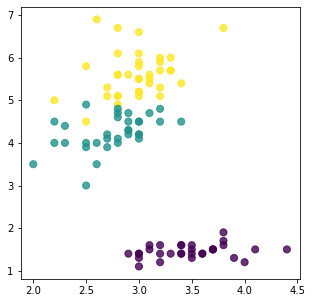

In [3]:
plt.figure(figsize=(5,5))
plt.scatter(x=trainX[:,1], y=trainX[:,2], s=50, alpha=0.8, c=trainY)
plt.show()

In [4]:
# cost funtion
def cross_entropy():
    global testX, testY
    predictY = np.dot(testX, weight)
    loss = np.sum(np.dot(testX.T,abs(predictY - testY)))
    print(f"cost: {loss}")

In [5]:
cross_entropy()

cost: 4316.83821603947


In [6]:
# define activation functions
nothing = lambda x: x
sigmoid = lambda x: 1 / (1 + 2.7182**(-x))
bipolar = lambda xSet: np.array([-1 if x < 0 else 1 for x in xSet])

# activation fn dictionary
actDict = {"nothing":nothing,"sigmoid":sigmoid,"bipolar":bipolar}

In [7]:
# define gradient descent rule
def gradient_descent_rule(name):
    global trainX, trainY, weight, lr
    
    activHX = actDict[name](np.dot(trainX, weight))
    weight -= (lr / trainX.shape[0]) * np.dot(trainX.T, (activHX - trainY))

In [8]:
for epoch in range(iterations):
    gradient_descent_rule("nothing")  # don't touch these

In [9]:
# define predict
def predict(case):
    global weight
    
    return round(np.dot(case, weight))

In [10]:
index = random.randrange(len(testY))
prediction = predict(testX[index,:])
print(f"pred: {prediction:.3f}, actual target: {testY[index]}")

pred: 0.000, actual target: 0


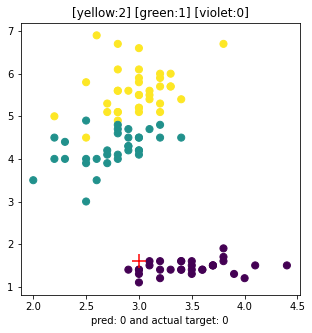

In [11]:
plt.figure(figsize=(5,5))
plt.scatter(x=trainX[:,1], y=trainX[:,2], s=50, alpha=1, c=trainY)
plt.scatter(testX[index,1], testX[index,2], c='r', s=200, marker='+')
plt.xlabel(f"pred: {prediction:.0f} and actual target: {testY[index]}")
plt.title("[yellow:2] [green:1] [violet:0]")
plt.show()

In [12]:
cross_entropy()

cost: 131.28202370234317
